In [389]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Question 1

In [390]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: >

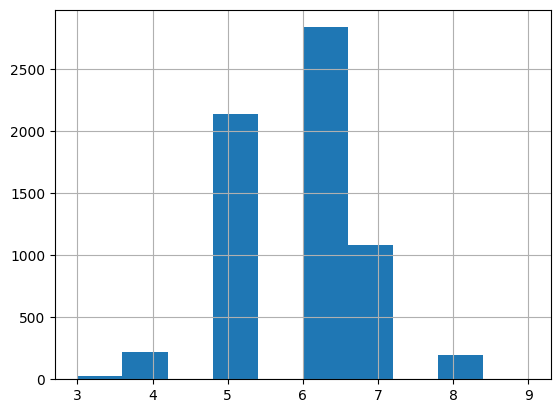

In [391]:
df['quality'].hist()

In [392]:
quality_counts = df['quality'].value_counts()
quality_counts

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [393]:
total_rows = len(df)
for quality, count in quality_counts.items():
    percentage = count / total_rows * 100
    print("Quality ", quality, " percentage of values: ", percentage, "%")

Quality  6  percentage of values:  43.650915807295675 %
Quality  5  percentage of values:  32.907495767277204 %
Quality  7  percentage of values:  16.60766507618901 %
Quality  4  percentage of values:  3.3246113590888102 %
Quality  8  percentage of values:  2.9706018162228722 %
Quality  3  percentage of values:  0.46175157765122365 %
Quality  9  percentage of values:  0.07695859627520393 %


The quality scores are not balanced.
Looking at the distribution, most wines have quality scores of 5, 6, or 7. There are very few wines with quality 3, 4, 8, or 9, for 1,2 & 10 there are none.

# Question 2

In [394]:
red_wines_df = df[df['type'] == 'red']
white_wines_df = df[df['type'] == 'white']

print("Red wines count:", len(red_wines_df))
print("White wines count:", len(white_wines_df))
print()
print("Red wine quality - Mean:", red_wines_df['quality'].mean())
print("Red wine quality - Median:", red_wines_df['quality'].median())
print()
print("White wine quality - Mean:", white_wines_df['quality'].mean())
print("White wine quality - Median:", white_wines_df['quality'].median())

Red wines count: 1599
White wines count: 4898

Red wine quality - Mean: 5.6360225140712945
Red wine quality - Median: 6.0

White wine quality - Mean: 5.87790935075541
White wine quality - Median: 6.0


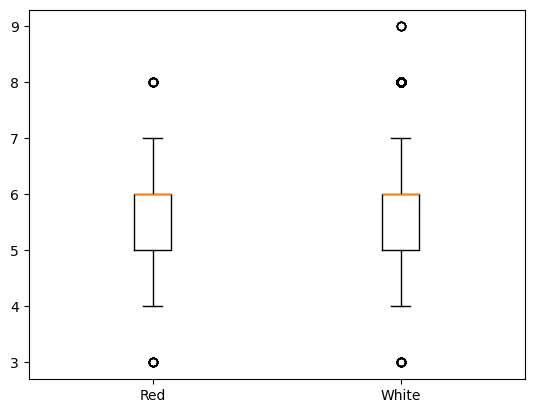

In [395]:
plt.boxplot([red_wines_df['quality'], white_wines_df['quality']], tick_labels=['Red', 'White'])
plt.show()

We will check if there is statistical significance between the quality values of red and white wines. We define alpha value as 0.05.

In [396]:
a_value = 0.05
p_value = scipy.stats.ttest_ind(red_wines_df['quality'], white_wines_df['quality']).pvalue

print("P value:", p_value)

if p_value < a_value:
    print("There is a statistically significant difference between red and white wine quality.")
else:
    print("There is no statistically significant difference between red and white wine quality.")

P value: 4.888069044201508e-22
There is a statistically significant difference between red and white wine quality.


Based on the analysis, white wine has a slightly higher mean quality score, both red and white wine have the same median quality (6), the t-test shows there is a statistically significant difference.
Therefore, white wine has higher average quality then red wine in our dataset, however the difference is very smal (~0.24) and both wine types have very similar quality distributions

# Question 3

In [397]:
df['residual sugar'].describe()

count    6495.000000
mean        5.444326
std         4.758125
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

<Axes: >

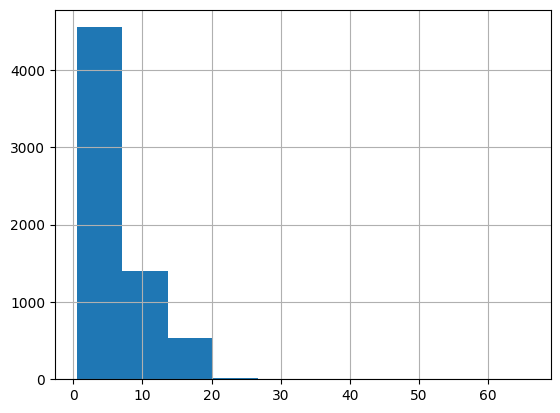

In [398]:
df['residual sugar'].hist()

In [399]:
# maximum dry is 10 g/l based on https://winefolly.com/deep-dive/dry-vs-sweet-wine/
sweet_threshold = 10

sweet_wines_df = df[df['residual sugar'] > sweet_threshold]
dry_wines_df = df[df['residual sugar'] <= sweet_threshold]

print("Sweet wines count:", len(sweet_wines_df))
print("Dry wines count:", len(dry_wines_df))
print()
print("Sweet wine quality - Mean:", sweet_wines_df['quality'].mean())
print("Sweet wine quality - Median:", sweet_wines_df['quality'].median())
print()
print("Dry wine quality - Mean:", dry_wines_df['quality'].mean())
print("Dry wine quality - Median:", dry_wines_df['quality'].median())

Sweet wines count: 1204
Dry wines count: 5291

Sweet wine quality - Mean: 5.740863787375416
Sweet wine quality - Median: 6.0

Dry wine quality - Mean: 5.835758835758836
Dry wine quality - Median: 6.0


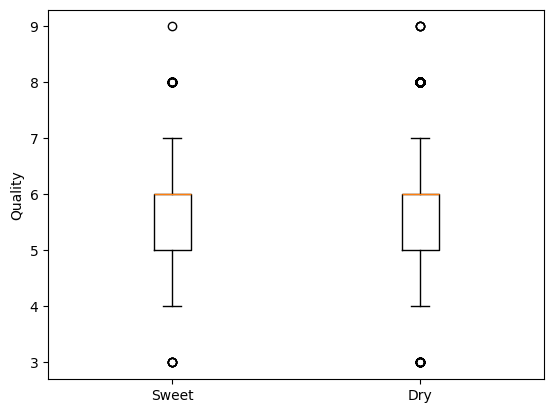

In [400]:
plt.boxplot([sweet_wines_df['quality'], dry_wines_df['quality']], tick_labels=['Sweet', 'Dry'])
plt.ylabel('Quality')
plt.show()

In [401]:
a_value = 0.05
p_value = scipy.stats.ttest_ind(sweet_wines_df['quality'], dry_wines_df['quality']).pvalue

print("P value:", p_value)

if p_value < a_value:
    print("There is a statistically significant difference between sweet and dry wine quality.")
else:
    print("There is no statistically significant difference between sweet and dry wine quality.")

P value: 0.0006632150848399345
There is a statistically significant difference between sweet and dry wine quality.


Sweet wines (residual sugar > 10) do not have higher quality than dry wines (dry wines have a slightly higher average quality score).
The statistical test shows there is a significant difference and dry wines score better on average. This could be because the majority of wines in the dataset are dry.

# Question 4

In [402]:
x = df.drop(columns=['quality']).assign(type=df['type'].map({'white': 0, 'red': 1})).to_numpy()
y = df['quality'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, test_size=0.1, random_state=0)

# Question 5

In [403]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X=x_train, y=y_train)

y_test_pred = model.predict(x_test)

test_mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
print("Test set MAE:", test_mae)

Test set MAE: 0.44769230769230767


# Question 6

In [404]:
mae_scores = []

for seed in range(10):
    x_train_seed, x_test_seed, y_train_seed, y_test_seed = train_test_split(x, y, train_size=0.9, test_size=0.1,
                                                                            random_state=seed)

    model_seed = DecisionTreeRegressor(random_state=seed)
    model_seed.fit(X=x_train_seed, y=y_train_seed)

    y_test_pred_seed = model_seed.predict(x_test_seed)
    test_mae_seed = mean_absolute_error(y_true=y_test_seed, y_pred=y_test_pred_seed)

    mae_scores.append(test_mae_seed)
    print("Seed", seed, "- Test MAE:", test_mae_seed)

print()
print("Mean MAE:", np.mean(mae_scores))
print("Standard deviation MAE:", np.std(mae_scores))

Seed 0 - Test MAE: 0.44769230769230767
Seed 1 - Test MAE: 0.4707692307692308
Seed 2 - Test MAE: 0.4230769230769231
Seed 3 - Test MAE: 0.48307692307692307
Seed 4 - Test MAE: 0.5015384615384615
Seed 5 - Test MAE: 0.4492307692307692
Seed 6 - Test MAE: 0.47384615384615386
Seed 7 - Test MAE: 0.4430769230769231
Seed 8 - Test MAE: 0.4338461538461538
Seed 9 - Test MAE: 0.49538461538461537

Mean MAE: 0.4621538461538462
Standard deviation MAE: 0.025243899022730665


The mean MAE gives us the expected error across different train-test splits instead of relying on a single train test split.
The standard deviation tells us how much the error varies between different train-test splits. A low standard deviation means the model is consistent and we can be confident the mean MAE is a good estimate. A high standard deviation means the model performance varies a lot depending on which data it sees, so we should be less confident.

# Question 7

In [405]:
# train is 90% of all data so proportionally 70/90 and 20/90 for final train set and validation set
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train, y_train, train_size=70/90, test_size=20/90, random_state=0)

print("Final splits:")
print("Train set size:", len(x_train_final), "(" + str(round(len(x_train_final) / len(df) * 100, 1)) + "% of total)")
print("Validation set size:", len(x_val), "(" + str(round(len(x_val) / len(df) * 100, 1)) + "% of total)")
print("Test set size:", len(x_test), "(" + str(round(len(x_test) / len(df) * 100, 1)) + "% of total)")

Final splits:
Train set size: 4547 (70.0% of total)
Validation set size: 1300 (20.0% of total)
Test set size: 650 (10.0% of total)


In [406]:
# hyperparameter combinations
param_combinations = [
    {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1},
    {'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 5},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 10},
    {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 10},
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
]

results = []

for i, params in enumerate(param_combinations):
    model = DecisionTreeRegressor(random_state=0, **params)
    model.fit(X=x_train_final, y=y_train_final)
    
    y_train_pred = model.predict(x_train_final)
    y_val_pred = model.predict(x_val)
    
    train_mae = mean_absolute_error(y_true=y_train_final, y_pred=y_train_pred)
    val_mae = mean_absolute_error(y_true=y_val, y_pred=y_val_pred)
    
    results.append({
        'combination': i + 1,
        'params': params,
        'train_mae': train_mae,
        'val_mae': val_mae
    })
    
    print("Combination", i + 1, ":", params)
    print("Train MAE:", train_mae)
    print("Validation MAE:", val_mae)
    print()

Combination 1 : {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}
Train MAE: 0.5828047490896535
Validation MAE: 0.5897739637503286

Combination 2 : {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
Train MAE: 0.5417195095414933
Validation MAE: 0.5684052690634646

Combination 3 : {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1}
Train MAE: 0.48818879924699676
Validation MAE: 0.5475351796925192

Combination 4 : {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
Train MAE: 0.3545154468410174
Validation MAE: 0.5320897251121165

Combination 5 : {'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1}
Train MAE: 0.0004398504508467121
Validation MAE: 0.5015384615384615

Combination 6 : {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1}
Train MAE: 0.5417195095414933
Validation MAE: 0.5684052690634646

Combination 7 : {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1}
Train MAE: 0.5417195095414933
Validat

In [407]:
# find best combination based on validation min MAE
best_result = min(results, key=lambda x: x['val_mae'])

print("Best combination:")
print("Parameters:", best_result['params'])
print("Train MAE:", best_result['train_mae'])
print("Validation MAE:", best_result['val_mae'])

Best combination:
Parameters: {'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1}
Train MAE: 0.0004398504508467121
Validation MAE: 0.5015384615384615


# Question 8

The validation set is more reliable for choosing hyperparameters.

The training set error can be misleading because the model has already seen and learned from that data. A complex model can get very low training error just by memorizing the training examples, but this doesn't mean it will work well on new data.
The validation set gives us a better estimate of how the model will perform on unseen data because the model hasn't been trained on it. If we choose hyperparameters based on validation error, we're picking the model that generalizes best, not the one that overfits.